## Student Name: Li Xiong, Jie Nan
## datasourse:
https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021

https://www.kaggle.com/datasets/varpit94/google-stock-data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from matplotlib.ticker import FuncFormatter

### import data files
#### These two datasets are the stock prices and volumes from 01/2020 to 03/2022 of Tesla and Google. 
Tesla and Google are both high-tech companies, 
Google is larger and more stable than Tesla. We want to compare these two datasets to know more about how these two stocks perform in the past two years so that we can have some guidence when buying stocks and choosing which company to work for. 

In [26]:
data_TSLA = pd.read_csv("/Users/lixiong/Downloads/TSLA.csv")
data_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020/1/2,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020/1/3,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020/1/6,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020/1/7,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020/1/8,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
557,2022/3/18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
558,2022/3/21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
559,2022/3/22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
560,2022/3/23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [27]:
data_GOOL = pd.read_csv("/Users/lixiong/Downloads/GOOGL.csv")
data_GOOL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020/1/2,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900
1,2020/1/3,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400
2,2020/1/6,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400
3,2020/1/7,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500
4,2020/1/8,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
...,...,...,...,...,...,...,...
557,2022/3/18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
558,2022/3/21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
559,2022/3/22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
560,2022/3/23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


### 1.Change labels: Add TSLA_/ GOOL_ to each column label
### 2. Turn the row number to date

In [28]:
data_TSLA.columns = ['TSLA_' + col.lower() for col in data_TSLA.columns]
data_TSLA = data_TSLA.set_index(pd.DatetimeIndex(data_TSLA['TSLA_date'].values))
data_TSLA

,TSLA_date,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_adj close,TSLA_volume
2020-01-02,2020/1/2,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,2020/1/3,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,2020/1/6,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,2020/1/7,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,2020/1/8,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
2022-03-18,2022/3/18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,2022/3/21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,2022/3/22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2022-03-23,2022/3/23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [29]:
data_GOOL.columns = ['GOOL_' + col.lower() for col in data_GOOL.columns]
data_GOOL = data_GOOL.set_index(pd.DatetimeIndex(data_GOOL['GOOL_date'].values))
data_GOOL

,GOOL_date,GOOL_open,GOOL_high,GOOL_low,GOOL_close,GOOL_adj close,GOOL_volume
2020-01-02,2020/1/2,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900
2020-01-03,2020/1/3,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400
2020-01-06,2020/1/6,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400
2020-01-07,2020/1/7,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500
2020-01-08,2020/1/8,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
...,...,...,...,...,...,...,...
2022-03-18,2022/3/18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2022/3/21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2022/3/22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2022/3/23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


### Column labels of datasets

In [33]:
print(data_TSLA.columns.tolist())
print(data_GOOL.columns.tolist())

['TSLA_date', 'TSLA_open', 'TSLA_high', 'TSLA_low', 'TSLA_close', 'TSLA_adj close', 'TSLA_volume']
['GOOL_date', 'GOOL_open', 'GOOL_high', 'GOOL_low', 'GOOL_close', 'GOOL_adj close', 'GOOL_volume']


### Combine Two datasets for the convenience of later data analysis

In [30]:
df = pd.concat([data_TSLA, data_GOOL], axis = 1)
df

,TSLA_date,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_adj close,TSLA_volume,GOOL_date,GOOL_open,GOOL_high,GOOL_low,GOOL_close,GOOL_adj close,GOOL_volume
2020-01-02,2020/1/2,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,2020/1/2,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900
2020-01-03,2020/1/3,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,2020/1/3,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400
2020-01-06,2020/1/6,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,2020/1/6,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400
2020-01-07,2020/1/7,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,2020/1/7,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500
2020-01-08,2020/1/8,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,2020/1/8,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,2022/3/18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022/3/18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2022/3/21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022/3/21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2022/3/22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022/3/22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2022/3/23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022/3/23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


### General information of Tesla stock, average/min/max price, etc.

In [31]:
data_TSLA.describe()

,TSLA_open,TSLA_high,TSLA_low,TSLA_close,TSLA_adj close,TSLA_volume
count,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,573.481819,586.980227,559.128467,573.820529,573.820529,4.896535e+07
std,305.381363,312.013998,297.980862,305.243243,305.243243,3.693749e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,9.800600e+06
25%,298.273987,305.696999,289.507004,297.602486,297.602486,2.352268e+07
50%,632.100006,651.390015,619.980011,641.075012,641.075012,3.459330e+07
75%,787.537521,804.369995,776.232514,793.132522,793.132522,6.650105e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


### General information of Google stock, average/min/max price, etc.

In [32]:
data_GOOL.describe()

,GOOL_open,GOOL_high,GOOL_low,GOOL_close,GOOL_adj close,GOOL_volume
count,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,2053.744466,2075.870298,2031.227974,2054.397564,2054.397564,1.785672e+06
std,593.638103,595.799344,588.965676,592.111032,592.111032,8.229071e+05
min,1056.369995,1066.910034,1008.869995,1054.130005,1054.130005,4.656000e+05
25%,1491.447510,1509.160004,1478.264953,1491.645019,1491.645019,1.255200e+06
50%,2029.994995,2058.959961,2005.309998,2028.824951,2028.824951,1.560800e+06
75%,2685.174988,2712.455017,2657.430054,2684.544921,2684.544921,2.071900e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,6.160000e+06


### General information about two datasets. Missing numbers and dtype, etc.

In [34]:
data_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 562 entries, 2020-01-02 to 2022-03-24
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TSLA_date       562 non-null    object 
 1   TSLA_open       562 non-null    float64
 2   TSLA_high       562 non-null    float64
 3   TSLA_low        562 non-null    float64
 4   TSLA_close      562 non-null    float64
 5   TSLA_adj close  562 non-null    float64
 6   TSLA_volume     562 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 35.1+ KB


In [35]:
data_GOOL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 562 entries, 2020-01-02 to 2022-03-24
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GOOL_date       562 non-null    object 
 1   GOOL_open       562 non-null    float64
 2   GOOL_high       562 non-null    float64
 3   GOOL_low        562 non-null    float64
 4   GOOL_close      562 non-null    float64
 5   GOOL_adj close  562 non-null    float64
 6   GOOL_volume     562 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 35.1+ KB


### Open price, Close price and Comparison of two prices for Tesla

#### Close price of Tesla

Tesla grows fast in the fast two years, the price increased a lot from 100 dollars to more than 1200 dollars, but there are also a lot of ups and downs, it may increase for $200 in several days and then decrease sharply.

#### Reasons of the ups and downs:

2020.08: 2 for 1 split

2020.11: S&P500 accepted Tesla for inclusion after five consecutive quarters of profit of Tesla

2021.02-2021.05: Tesla tumbled due to the Bitcoin

2021.10: Tesla had a new deal with hertz made Tesla the first automaker to reach $1T market cap

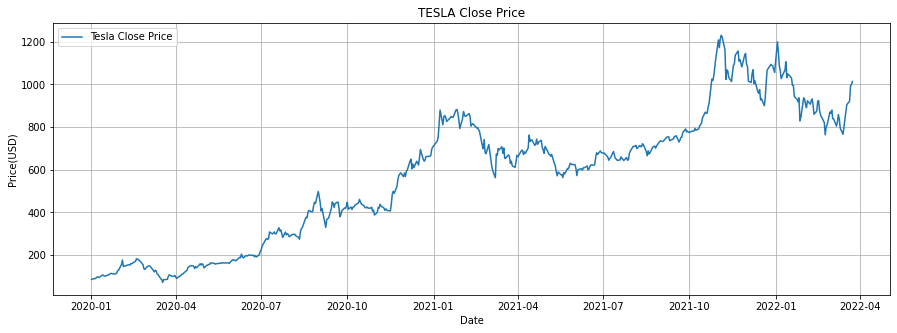

In [36]:
fig1=plt.figure(figsize=(15, 5))
plt.plot(data_TSLA['TSLA_close'], label='Tesla Close Price')
plt.title('TESLA Close Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig1.savefig('TESLA_Close_Price.png')

#### Open price of Tesla

Compared to close price, open price is almost the same.

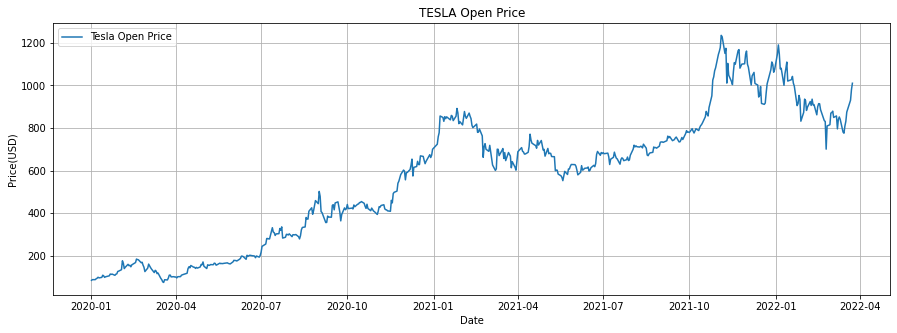

In [37]:
fig1=plt.figure(figsize=(15, 5))
plt.plot(data_TSLA['TSLA_open'], label='Tesla Open Price')
plt.title('TESLA Open Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig1.savefig('TESLA_Open_Price.png')

#### The Comparison of Close Price and Open Price of Tesla

Even in a graph that lasts such a long time, we still can see in some days, the gap between close price and open price is large, which shows the turbulance of this stock.

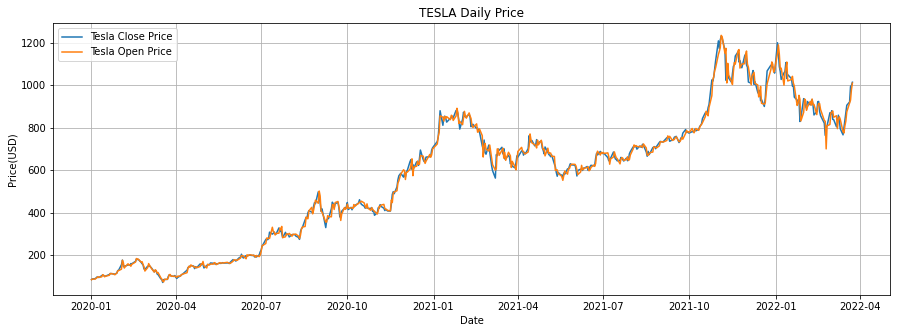

In [38]:
fig1=plt.figure(figsize=(15, 5))
plt.plot(data_TSLA['TSLA_close'], label='Tesla Close Price')
plt.plot(data_TSLA['TSLA_open'], label='Tesla Open Price')
plt.title('TESLA Daily Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig1.savefig('TESLA_Daily_Price.png')

### Open price, Close price and Comparison of two prices for Google

#### Close Price for Google
Evidently, Google stock has high value, the price increased of around 2000 dollars in this two years, and this stock is more stable than Tesla stock.

#### Reasons of the ups and downs
2020.03: Stock price fell 13% in March caused by the COVID-19, alphabet was losing business.

2021:  Price surged by 65%.

2022.02: A new lawsuit abount antitrust was launched against Google. the stock fell 5%.

2022.02: Alphabet anounced a 20:1 stock split


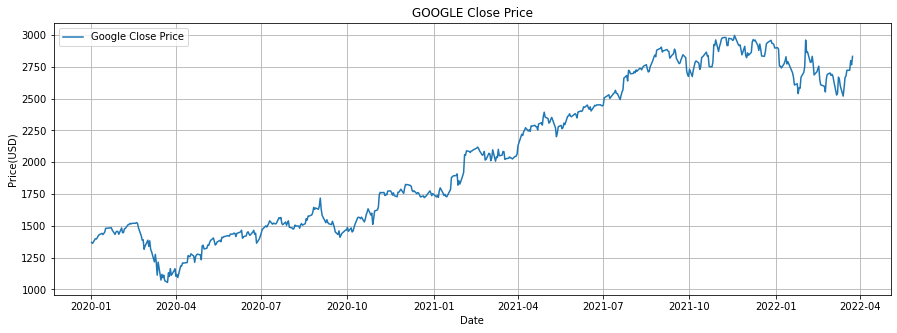

In [39]:
fig2=plt.figure(figsize=(15, 5))
plt.plot(data_GOOL['GOOL_close'], label='Google Close Price')
plt.title('GOOGLE Close Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig2.savefig('GOOGLE_Close_Price.png')

#### Open Price for Google

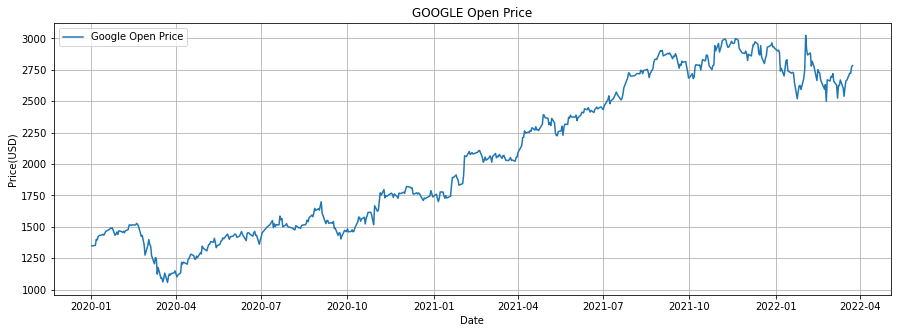

In [40]:
fig2=plt.figure(figsize=(15, 5))
plt.plot(data_GOOL['GOOL_open'], label='Google Open Price')
plt.title('GOOGLE Open Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig2.savefig('GOOGLE_Open_Price.png')

#### The Comparison of Close Price and Open Price of Tesla
Compared to Tesla stock's volatility, the gap between open price and close price is smaller than this of Tesla.

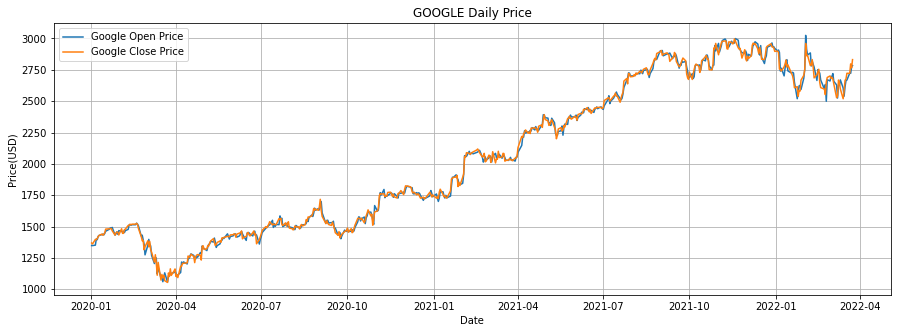

In [41]:
fig2=plt.figure(figsize=(15, 5))
plt.plot(data_GOOL['GOOL_open'], label='Google Open Price')
plt.plot(data_GOOL['GOOL_close'], label='Google Close Price')
plt.title('GOOGLE Daily Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig2.savefig('GOOGLE_daily_Price.png')

### The Close Price Contrast of Tesla and Google

The stock price for Google is much higher than Tesla stock, and Google also increased more than Tesla.

In the long term, the two stocks keeps growing.

Though unpredictable, the stock price will still grow afterward.

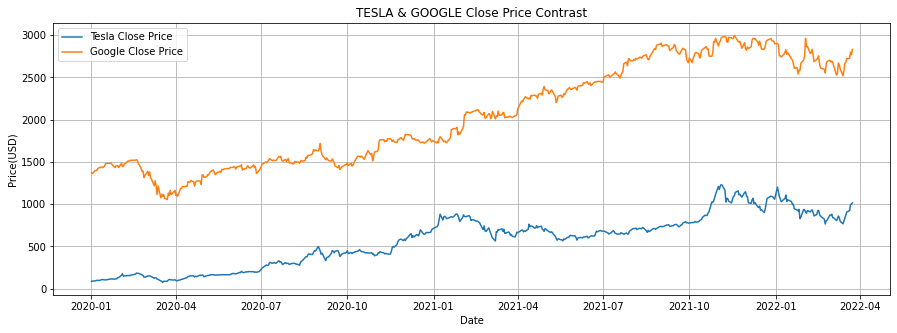

In [45]:
fig1=plt.figure(figsize=(15, 5))
plt.plot(data_TSLA['TSLA_close'], label='Tesla Close Price')
plt.plot(data_GOOL['GOOL_close'], label='Google Close Price')
plt.title('TESLA & GOOGLE Close Price Contrast')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)
plt.legend()
plt.show()
fig1.savefig('TESLA & GOOGLE Close Price Contrast.png')

### Box-plot of two stocks's daily volume

The average volume for Tesla is 40 million while 1.5 million for Google.

There are more outliers of Google's volume, this may because people have more confidence in Google so even when the price are high people will also buy stock. But as for Tesla, when prices are high, people tend to be more cautious.

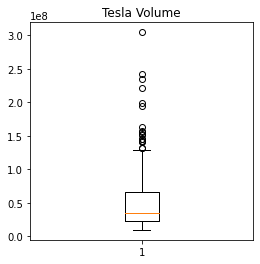

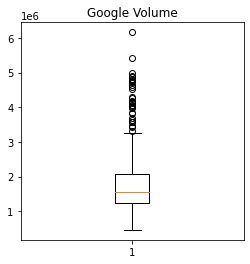

In [48]:
volume_TSLA= data_TSLA.loc[:,'TSLA_volume']
volume_GOOL= data_GOOL.loc[:,'GOOL_volume']

fig1=plt.figure(figsize=(4,4))
plt.boxplot(volume_TSLA)
plt.title("Tesla Volume")
plt.show()
fig1.savefig('Tesla Volume')


fig2=plt.figure(figsize=(4,4))
plt.boxplot(volume_GOOL)
plt.title("Google Volume")
plt.show()
fig2.savefig('Google Volume')

### Combine the Open price and Close Price for two stocks and then calculate the daily votality ratio

In [47]:
quotations = df[['TSLA_open', 'TSLA_close', 'GOOL_open','GOOL_close']].copy()
quotations['TSLA_change'] = (quotations['TSLA_close'] / quotations['TSLA_open'] - 1) * 100
quotations['GOOL_change'] = (quotations['GOOL_close'] / quotations['GOOL_open'] - 1) * 100
quotations

,TSLA_open,TSLA_close,GOOL_open,GOOL_close,TSLA_change,GOOL_change
2020-01-02,84.900002,86.052002,1348.410034,1368.680054,1.356890,1.503253
2020-01-03,88.099998,88.601997,1348.000000,1361.520020,0.569806,1.002969
2020-01-06,88.094002,90.307999,1351.630005,1397.810059,2.513221,3.416619
2020-01-07,92.279999,93.811996,1400.459961,1395.109985,1.660161,-0.382016
2020-01-08,94.739998,98.428001,1394.819946,1405.040039,3.892762,0.732718
...,...,...,...,...,...,...
2022-03-18,874.489990,905.390015,2668.489990,2722.510010,3.533491,2.024367
2022-03-21,914.979980,921.159973,2723.270020,2722.030029,0.675424,-0.045533
2022-03-22,930.000000,993.979980,2722.030029,2797.360107,6.879568,2.767423
2022-03-23,979.940002,999.109985,2774.050049,2765.510010,1.956240,-0.307855


### Tesla and google prices  fluctuation rate contrast.
#### From 01/2021 to 04/2022,in this period of time,Tesla's daily price volatility is more than Google.
The stock price fluctuation rate for Tesla is higher than Google, in some days it increases or decreases for around 15%
Google is more steady than Tesla, and the fluctuation rate is between ±5%

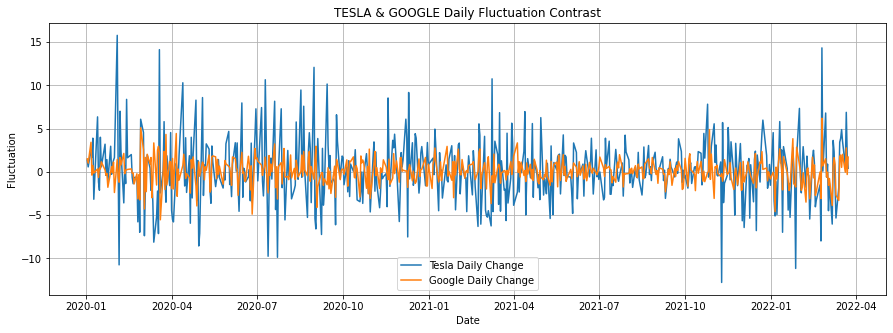

In [22]:
fig1=plt.figure(figsize=(15, 5))
plt.plot(quotations['TSLA_change'], label='Tesla Daily Change')
plt.plot(quotations['GOOL_change'], label='Google Daily Change')

plt.title('TESLA & GOOGLE Daily Fluctuation Contrast')
plt.xlabel('Date')
plt.ylabel('Fluctuation')
plt.grid(True)
plt.legend()
plt.show()
fig1.savefig('TESLA & GOOGLE Daily Fluctuation Contrast')

### Compare the ratio when two stocks increase or decrease in the same day.

In [49]:
quotations['similarity'] = (quotations['TSLA_change'] * quotations['GOOL_change'] > 0) * 1
quotations

,TSLA_open,TSLA_close,GOOL_open,GOOL_close,TSLA_change,GOOL_change,similarity
2020-01-02,84.900002,86.052002,1348.410034,1368.680054,1.356890,1.503253,1
2020-01-03,88.099998,88.601997,1348.000000,1361.520020,0.569806,1.002969,1
2020-01-06,88.094002,90.307999,1351.630005,1397.810059,2.513221,3.416619,1
2020-01-07,92.279999,93.811996,1400.459961,1395.109985,1.660161,-0.382016,0
2020-01-08,94.739998,98.428001,1394.819946,1405.040039,3.892762,0.732718,1
...,...,...,...,...,...,...,...
2022-03-18,874.489990,905.390015,2668.489990,2722.510010,3.533491,2.024367,1
2022-03-21,914.979980,921.159973,2723.270020,2722.030029,0.675424,-0.045533,0
2022-03-22,930.000000,993.979980,2722.030029,2797.360107,6.879568,2.767423,1
2022-03-23,979.940002,999.109985,2774.050049,2765.510010,1.956240,-0.307855,0


### From 01/2020 to 03/2022, 61% of the time two stocks will increase and decrease together. 

1.High-tech industry are easy to be impacted by same factors.

2.Single company remains diffrent due to the specific products and company policy.

In [24]:
result = quotations['similarity'].sum() / len(quotations) 
result

0.6103202846975089

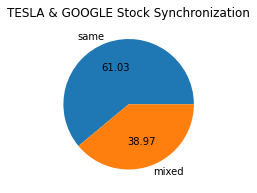

In [25]:
fig1=plt.figure(figsize=(10, 3))
state = ['same', 'mixed']
simi = [result, 1 - result]
plt.pie(simi, labels=state, autopct='%.2f')
plt.title('TESLA & GOOGLE Stock Synchronization')
fig1.savefig('TESLA & GOOGLE Stock Synchronization')

### Calculate MA30 and MA100 of the two stocks. 
#### MA30 is a sign of  short-term transaction.MA100 is sign of a long-term transaction.

Moving average (MA) is a short term technical indicator of how stock prices are moving. It clears out cluttered daily prices while also reflecting the volatility. It is merely the average of closing prices over the last 30/100 days. 

#### conclusion:Tesla's price and Goolgle's performance are mostly MA100 is under MA30.

When MA100 is under MA30, the trend of the stock is rising.

When MA30 is under MA100, the stock is possible to drop.

In fact,in real stock analyse we have more MA lines,like MA5,MA10,etc...

In [50]:
ma30 = pd.DataFrame()
ma30['AM'] = data_TSLA['TSLA_adj close'].rolling(window=30).mean()
ma100 = pd.DataFrame()
ma100['AM'] = data_TSLA['TSLA_adj close'].rolling(window=100).mean()

In [52]:
data=pd.DataFrame()
data['TESLA']=data_TSLA['TSLA_adj close']
data['MA30']=ma30['AM']
data['MA100']=ma100['AM']

In [57]:
def signal(data):
        signalBuy=[]
        signalSell=[]
        f=-1
        for i in range(len(data)):
            if data['MA30'][i]>data['MA100'][i]:
                if f != 1:
                    signalBuy.append(data['TESLA'][i])
                    signalSell.append(np.nan)
                    f=1
                else:
                    signalBuy.append(np.nan)
                    signalSell.append(np.nan)

            elif data['MA30'][i]< data['MA100'][i]:    
                if  f!= 0:
                    signalBuy.append(np.nan)
                    signalSell.append(data['TESLA'][i])
                    f=0
                else:
                    signalBuy.append(np.nan)
                    signalSell.append(np.nan)
            else :
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
                
        return signalBuy, signalSell

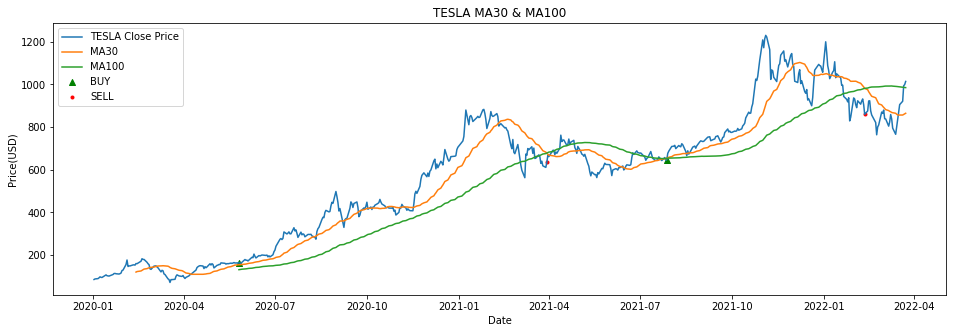

In [58]:
buy_sell=signal(data)
data['buy signal']=buy_sell[0]
data['sell signal']=buy_sell[1]
fig1=plt.figure(figsize=(16,5))
plt.plot(data['TESLA'],label='TESLA Close Price')
plt.plot(data['MA30'],label='MA30')
plt.plot(data['MA100'],label='MA100')
plt.scatter(data.index,data['buy signal'],label='BUY',marker='^',color='g')
plt.scatter(data.index,data['sell signal'],label='SELL',marker='.',color='r')
plt.title('TESLA MA30 & MA100')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()
fig1.savefig('TESLA MA30 & MA100')


When MA100 is under MA30,the trend of the stock is rising.

When MA30 is under MA100,the stock is possible to drop.

Green Triangles means you can buy this stock and red dots mean you must sell this stock.

In [31]:
ma30 = pd.DataFrame()
ma30['AM'] = data_GOOL['GOOL_adj close'].rolling(window=30).mean()
ma100 = pd.DataFrame()
ma100['AM'] = data_GOOL['GOOL_adj close'].rolling(window=100).mean()

In [500]:
data2=pd.DataFrame()
data2['GOOGLE']=data_GOOL['GOOL_adj close']
data2['MA30']=ma30['AM']
data2['MA100']=ma100['AM']

In [511]:
def signal(data):
        signalBuy=[]
        signalSell=[]
        f=-1
        for i in range(len(data)):
            if data['MA30'][i]>data['MA100'][i]:
                if f != 1:
                    signalBuy.append(data['GOOGLE'][i])
                    signalSell.append(np.nan)
                    f=1
                else:
                    signalBuy.append(np.nan)
                    signalSell.append(np.nan)

            elif data['MA30'][i]< data['MA100'][i]:    
                if  f!= 0:
                    signalBuy.append(np.nan)
                    signalSell.append(data['GOOGLE'][i])
                    f=0
                else:
                    signalBuy.append(np.nan)
                    signalSell.append(np.nan)
            else :
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
                
        return signalBuy, signalSell

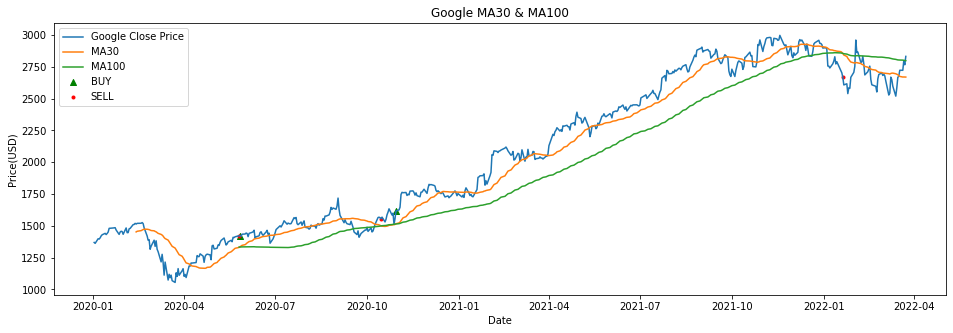

In [510]:
buy_sel2=signal(data2)
data2['buy signal']=buy_sel2[0]
data2['sell signal']=buy_sel2[1]
fig1=plt.figure(figsize=(16,5))
plt.plot(data2['GOOGLE'],label='Google Close Price')
plt.plot(data2['MA30'],label='MA30')
plt.plot(data2['MA100'],label='MA100')
plt.scatter(data2.index,data2['buy signal'],label='BUY',marker='^',color='g')
plt.scatter(data2.index,data2['sell signal'],label='SELL',marker='.',color='r')
plt.title('Google MA30 & MA100')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()
fig1.savefig('Google MA30 & MA100')

From the above two pictures,we can see that have some intersections between these lines.When the MA30 is up to MA100.It means we can hold this stock in short term.When the MA100 is up to MA30.It means we must be sell this stock.Through these two graphes,we can get the right time to buy or sell these two stocks to maximize our income.

### Calculate the PBV(Price byValue) of two stocks
#### PBV shows the volume of shares traded at a specific price level, often used to predict areas of support and resistance
When stock prices are low,the volumn is high.But when stock prices is high,the trading volumn  tends to be stable.

Volume increases and prices fall, volume decreases and prices increase -> be careful of the reversal market

Volume and prices both increase -> the market is hot and can make profit

Volume and prices both decrease -> unpredictable market

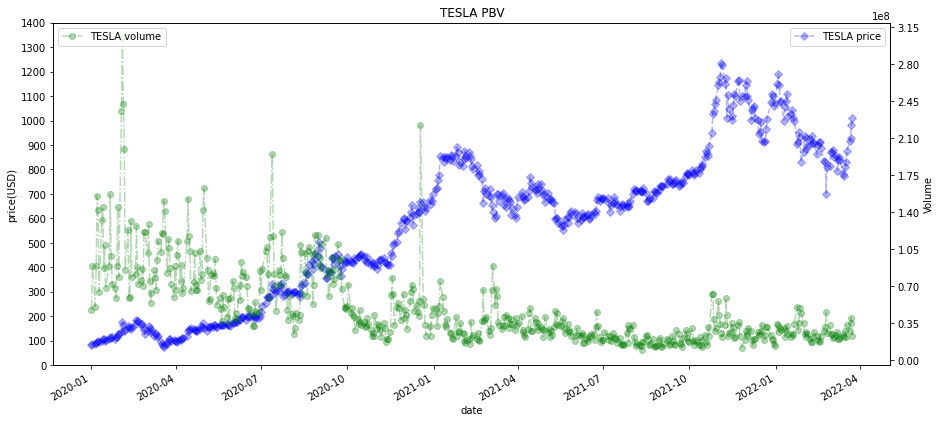

In [522]:
fig=plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)
df['TSLA_open'].plot(ax = ax1, style='bD--',alpha = 0.3, label='TESLA price')
plt.xlabel('date')
ax1.set_yticks(np.arange(0, 1500, 100))
ax1.set_ylabel('price(USD)')
plt.legend(loc = 1)

ax2 = ax1.twinx()
df['TSLA_volume'].plot(ax = ax2, style='go-.',alpha = 0.3, label='TESLA volume')
ax2.set_yticks(np.arange(0, 350000000, 35000000))
ax2.set_ylabel('Volume')
plt.legend(loc = 2)
plt.title('TESLA PBV')
fig.savefig('Tesla PBV')

According to the graph below,Google's stock is more stable than Tesla's price. The stock price has been in an upward trend except 03/2020 to 04/2020.

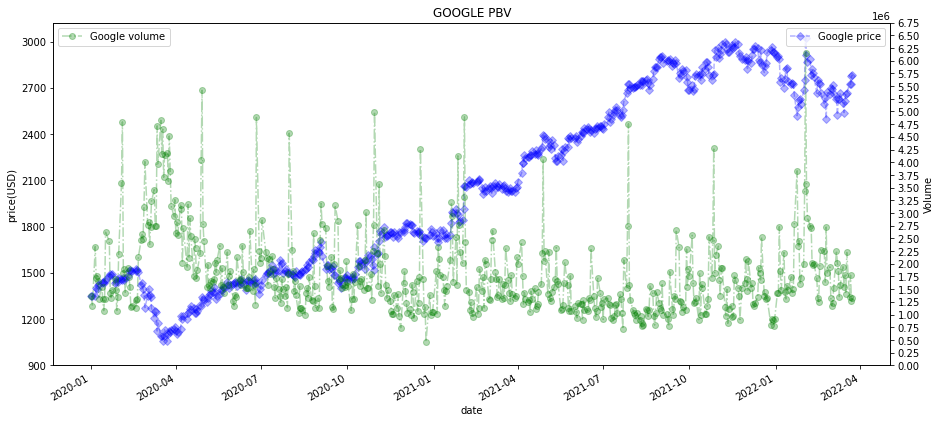

In [524]:
fig=plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)
df['GOOL_open'].plot(ax = ax1, style='bD--',alpha = 0.3, label='Google price')
plt.xlabel('date')
ax1.set_yticks(np.arange(900, 3300, 300))
ax1.set_ylabel('price(USD)')
plt.legend(loc = 1)
ax2 = ax1.twinx()
df['GOOL_volume'].plot(ax = ax2, style='go-.',alpha = 0.3, label='Google volume')
#plt.xlabel('date')
#ax1.set_yticks
ax2.set_yticks(np.arange(0, 7000000, 250000))
ax2.set_ylabel('Volume')
plt.legend(loc = 2)
plt.title('GOOGLE PBV')
fig.savefig('Google PBV')

### Conclusion:

Firstly we can evaluate the operating status of a company by analyzing its stock performance. It provides a reference value for our investment and employment choices. 

Secondly, Stock Market is turbulent and unpredictable, and a lot of factors may have an impact on the stock price. So predicting a stock is complex. 

At last, I have to say that the stock market is full of risks and we must be cautious when we are investing. 

People can buy Tesla if they want to earn quick money, they need to buy when the price is low, and then sell the stock quickly when the stock price increase. 

Or if people just want to make some investment and then leave the stock account alone, they can buy Google and then wait for one or two years.